In [57]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import tensorflow  as tf

In [20]:
company = "META"

start = "2021-09-01"
end = "2023-08-25"

data = yf.download(
    tickers=company, 
    start=start, 
    end=end, 
    interval="60m"
) 

[*********************100%***********************]  1 of 1 completed


In [72]:
test_coef = 0.1
split_idx = int(len(data)*(1-test_coef))
print(split_idx) 

data_train, data_test = data[:split_idx], data[split_idx:]
print(data_train.shape, data_test.shape)

3126
(3126, 6) (348, 6)


In [50]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data_train.Close.values.reshape(-1,1))

prediction_days = 60

xtr, ytr = [], []

for x in range(prediction_days, len(scaled_data)):
    xtr.append(scaled_data[x-prediction_days:x, 0])
    ytr.append(scaled_data[x, 0])

xtr, ytr = np.array(xtr), np.array(ytr)
print(xtr.shape, ytr.shape)
xtr = np.reshape(xtr, (xtr.shape[0], xtr.shape[1], 1))
print(xtr.shape)

(3066, 60) (3066,)
(3066, 60, 1)


In [54]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(units=64, return_sequences=True, input_shape=(xtr.shape[1], 1)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units=64, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units=64))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=1))

model.compile(
    optimizer='adam', 
    loss='mean_squared_error',
    metrics=["mean_squared_error"]
)
history = model.fit(
    xtr, ytr, 
    epochs=25, 
    batch_size=32,
    validation_split=0.2
)

2023-08-30 21:40:57.460264: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-30 21:40:57.461424: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-30 21:40:57.462282: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/25


2023-08-30 21:40:57.774359: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-30 21:40:57.775532: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-30 21:40:57.776360: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

77/77 [==============================] - ETA: 0s - loss: 0.0105 - mean_squared_error: 0.0105

2023-08-30 21:41:04.830422: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-30 21:41:04.831745: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-30 21:41:04.832819: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

77/77 [==============================] - 8s 56ms/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 3.2765e-04 - val_mean_squared_error: 3.2765e-04
Epoch 2/25
77/77 [==============================] - 3s 44ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 2.8018e-04 - val_mean_squared_error: 2.8018e-04
Epoch 3/25
77/77 [==============================] - 4s 48ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 4.6974e-04 - val_mean_squared_error: 4.6974e-04
Epoch 4/25
77/77 [==============================] - 4s 49ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 7.6453e-04 - val_mean_squared_error: 7.6453e-04
Epoch 5/25
77/77 [==============================] - 3s 45ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 4.5892e-04 - val_mean_squared_error: 4.5892e-04
Epoch 6/25
77/77 [==============================] - 3s 42ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 4.1069e-04 - val_mean_squared_error: 4.1069e-

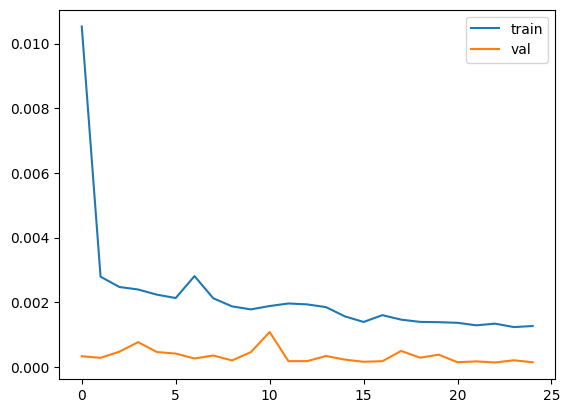

In [59]:
metric = "mean_squared_error"
history.history.keys()
plt.plot(history.history[metric])
plt.plot(history.history["val_"+metric])
plt.legend(["train", "val"])
plt.show()

In [73]:
data_train.tail()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-06-13 09:30:00,274.880005,275.720001,271.079987,271.663605,271.663605,4660664
2023-06-13 10:30:00,271.630005,274.019989,271.179993,273.470001,273.470001,2076969
2023-06-13 11:30:00,273.480011,273.500000,270.820007,271.500000,271.500000,1823913
2023-06-13 12:30:00,271.519989,272.420013,271.460693,271.702789,271.702789,1329313
2023-06-13 13:30:00,271.709991,272.029999,269.510010,270.019989,270.019989,1844689


In [74]:
data_test.head()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-06-13 14:30:00,270.040009,271.480011,269.092285,270.829987,270.829987,1495666
2023-06-13 15:30:00,270.839996,271.450012,270.690002,271.320007,271.320007,1094207
2023-06-14 09:30:00,271.890015,274.989990,270.649994,273.700012,273.700012,3895013
2023-06-14 10:30:00,273.709991,274.799988,272.709991,273.209991,273.209991,1893207
2023-06-14 11:30:00,273.279999,273.540009,271.399994,272.410004,272.410004,1328985


In [83]:
model_inputs = pd.concat([
    data_train.tail(prediction_days),
    data_test
])
model_inputs = model_inputs.Close.values.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)  

xts = []

for x in range(prediciton_days, len(model_inputs)):
    xts.append(model_inputs[x-prediction_days:x, 0])

xts = np.array(xts) 
xts = np.reshape(xts, (xts.shape[0], xts.shape[1], 1))

preds = model.predict(xts)
preds = scaler.inverse_transform(preds)

NameError: name 'prediciton_days' is not defined

In [81]:
scaler.transform(model_inputs)  

ValueError: Expected 2D array, got 1D array instead:
array=[268.88500977 270.97000122 272.27139282 273.23999023 272.42999268
 272.60998535 272.69000244 273.01998901 273.14190674 274.19000244
 272.92001343 272.57998657 272.63000488 273.67999268 275.1499939
 273.92001343 272.63000488 271.73001099 271.77999878 271.39001465
 275.77999878 275.01998901 274.93099976 274.04998779 272.43499756
 271.77999878 271.07000732 271.14001465 269.89498901 267.67999268
 267.01000977 266.14001465 265.15499878 263.63000488 262.72000122
 266.78158569 267.56359863 265.84500122 265.08999634 264.94500732
 264.57998657 267.54998779 265.25       264.33999634 265.63000488
 264.94500732 264.41000366 264.95001221 268.49499512 268.13009644
 268.99099731 268.82998657 269.20739746 270.95999146 271.07998657
 271.66360474 273.47000122 271.5        271.70278931 270.01998901
 270.82998657 271.32000732 273.70001221 273.20999146 272.41000366
 271.57998657 269.82000732 271.73999023 273.38000488 276.04998779
 276.92498779 278.92001343 279.8999939  282.07489014 283.16000366
 281.84500122 283.69000244 284.05499268 286.47000122 284.70498657
 284.875      283.02999878 281.3500061  276.70001221 280.13061523
 282.66000366 282.48010254 283.9750061  284.0249939  284.32998657
 282.88000488 279.54000854 279.01000977 279.30999756 281.82501221
 281.9750061  281.63000488 282.39001465 280.10998535 279.95999146
 278.79000854 281.33999634 282.6499939  284.88000488 281.36999512
 282.71499634 286.13000488 288.3999939  286.75       285.66000366
 288.67999268 288.01998901 283.98999023 278.79000854 279.14498901
 279.38000488 279.63000488 278.45001221 283.52270508 285.24499512
 286.57998657 286.95788574 288.81500244 287.26000977 287.02999878
 287.73999023 286.4598999  285.88000488 285.06219482 285.61990356
 285.48498535 285.32000732 284.30499268 283.79620361 283.73999023
 282.8999939  281.8999939  281.44500732 281.58999634 287.75
 287.42001343 287.82998657 287.30999756 288.27600098 287.11999512
 286.86999512 286.80999756 285.80718994 286.25       297.23498535
 295.38000488 294.29251099 295.33499146 295.10549927 295.52999878
 294.36999512 296.15499878 293.48989868 294.54998779 291.94000244
 293.4750061  293.42001343 291.98001099 290.         291.92001343
 291.90499878 294.07998657 294.64001465 292.14001465 290.54000854
 293.36999512 291.730896   288.60009766 291.62850952 292.57998657
 291.83499146 294.17001343 294.47988892 297.22970581 297.57998657
 297.86999512 296.35998535 297.19000244 298.26000977 306.99499512
 307.20568848 306.73999023 306.63000488 307.19000244 308.29000854
 309.35998535 310.77999878 312.00320435 314.39001465 314.70001221
 314.17999268 314.01000977 313.3999939  312.60998535 313.17999268
 312.33999634 312.66000366 310.82818604 308.47988892 308.92001343
 305.93499756 306.1499939  308.08010864 308.94500732 310.54000854
 310.66000366 310.60998535 309.82998657 310.02999878 310.79998779
 312.79998779 313.1000061  311.89001465 312.01998901 312.97000122
 317.49499512 315.03359985 313.95001221 313.17001343 315.60998535
 315.95999146 309.89001465 308.         306.70999146 306.96990967
 304.99938965 303.18499756 302.51998901 297.68130493 298.69989014
 292.5        296.88000488 294.70999146 293.88000488 294.26998901
 294.63000488 290.76501465 291.03158569 292.08999634 292.1000061
 290.49990845 291.60998535 292.47000122 292.88500977 294.34851074
 295.76998901 295.04998779 294.73498535 294.45001221 297.61999512
 295.05999756 295.74301147 297.27990723 298.27999878 298.66299438
 298.76010132 318.93429565 320.04998779 317.91000366 313.8500061
 313.66000366 313.13000488 311.70001221 321.5        324.51998901
 324.84039307 322.50640869 324.18569946 324.11999512 325.3999939
 322.54000854 322.56500244 321.17999268 319.64001465 319.67059326
 319.09500122 318.60998535 318.15991211 321.84991455 322.29000854
 322.75869751 322.45001221 323.04998779 322.67999268 316.80999756
 312.98999023 311.75338745 313.73999023 315.07998657 312.77999878
 314.32998657 311.92999268 314.82998657 314.1499939  314.70001221
 314.20999146 312.77999878 313.19000244 313.6499939  314.75
 315.77999878 314.10998535 311.29998779 311.68011475 310.73001099
 313.30999756 311.94000244 314.5        315.45001221 313.92001343
 315.5        316.55999756 313.60998535 312.13000488 311.48001099
 312.82540894 313.08529663 312.23001099 312.66000366 308.5
 303.73001099 306.35009766 308.01998901 308.68649292 306.75500488
 305.17001343 310.79000854 308.98550415 307.3999939  305.85998535
 306.07998657 305.69000244 305.79998779 304.07989502 301.06140137
 302.79998779 302.44000244 302.27999878 302.79998779 301.6499939
 300.95999146 303.19500732 303.23001099 304.35998535 303.54000854
 305.02999878 306.19000244 302.27999878 303.16000366 303.77999878
 303.6499939  302.14001465 300.14001465 301.92001343 299.74499512
 298.85998535 295.95001221 297.39001465 298.16500854 295.99499512
 294.27999878 291.54000854 292.20001221 293.56259155 292.92001343
 289.57501221 287.26998901 285.07998657 277.11999512 278.
 279.36499023 279.3611145  280.57998657 283.45001221 283.27999878
 285.3500061  285.80499268 288.26998901 289.08499146 289.66000366
 289.75       289.85998535 290.10128784 289.05969238 288.50009155
 289.07998657 288.63000488 288.01998901 287.58999634 293.07000732
 295.42001343 295.14001465 296.11999512 295.26000977 295.86999512
 294.25       292.51998901 290.51000977 290.14981079 290.26998901
 289.69000244 287.83999634 286.70001221].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.